# TP3 M1 info -- Introduction au traitement du signal, aux signaux sonores et aux images -- Filtres et convolutions

**But du TP** :
* Comprendre les avantages de l'utilisation de filtres et de convolutions sur les images

**Avertissement** :
Il peut être tentant d'utiliser ChatGPT ou d'autres outils d'écriture de code. Mais il ne s'agit que d'une introduction, couvrant des concepts très simples pour manipuler des fichiers. Nous vous recommandons fortement de ne pas l'utiliser. Vous aurez suffisamment de temps pour réaliser par vous-même les quelques fonctions qui vous sont demandées. Et vous les assimilerez bien mieux. Vous devrez réutiliser ces fonctions pour l'évaluation, ce qui vous confrontera à de nouvelles données. Essayez donc de rendre ces fonctions aussi générales que possible.

**Astuces**:
* Essayez de faire fonctionner vos algorithmes sur n'importe quelle taille d'image.
* N'hésitez pas à créer des fonctions pour chaque partie des traitements.

In [1]:
# OS setup
#!cat /etc/os-release
!apt-get install -q=2 tree

# Data loading
!git clone https://gitlab.com/jeromefarinas/tp-m1-ts.git

Selecting previously unselected package tree.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
Cloning into 'tp-m1-ts'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 78 (delta 1), reused 0 (delta 0), pack-reused 58
Receiving objects: 100% (78/78), 4.11 MiB | 24.90 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [2]:
# Some usefull library
import matplotlib.pyplot as plt
import scipy.signal
import numpy as np
from IPython.display import Audio
from scipy.signal import convolve2d


##Domaine spectral d'une image

Nous allons retravailler l'image de Lena.

![Extrait de Lena](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp2/lena.jpg?ref_type=heads)

Dans cette session, nous allons appliquer différents filtres.

**Rappels** :

* Filtre passe-bas binomial 3x3 :

$\frac{1}{16} \times
 \begin{pmatrix}
  1 & 2 & 1 \\
  2 & 4 & 2 \\
  1 & 2 & 1 \\
 \end{pmatrix}$

* Filtre passe-bas binomial 5x5 :

$\frac{1}{176} \times
 \begin{pmatrix}
  1 & 4  &  6 &  4 & 1 \\
  4 & 8  & 14 &  8 & 4 \\
  6 & 14 & 28 & 14 & 6 \\
  4 & 8  & 14 &  8 & 4 \\
  1 & 4  &  6 &  4 & 1 \\
 \end{pmatrix}$

* Filtre passe-haut PIKS 3x3 :

$\frac{1}{1} \times
 \begin{pmatrix}
  -1 & -1 & -1 \\
  -1 &  9 & -1 \\
  -1 & -1 & -1 \\
 \end{pmatrix}$

* Filtre passe-haut 5x5 (accentuation de la netteté) :

$\frac{1}{16} \times
 \begin{pmatrix}
  -1 & -1 & -1 & -1 & -1 \\
  -1 &  0 &  0 &  0 & -1 \\
  -1 &  0 & 32 &  0 & -1 \\
  -1 &  0 &  0 &  0 & -1 \\
  -1 & -1 & -1 & -1 & -1 \\
 \end{pmatrix}$

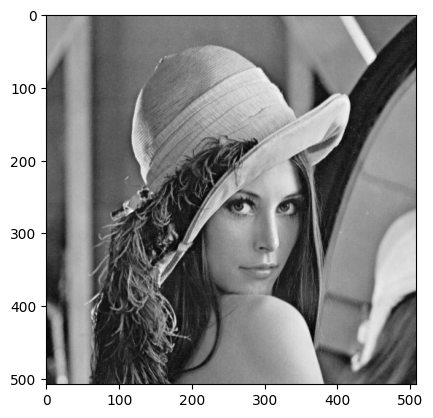

In [15]:
img = plt.imread('/content/tp-m1-ts/tp2/lena.jpg')

# Afficher l'image en niveaux de gris
plt.imshow(img, cmap='gray')
plt.show()

# Filtre passe-bas et convolution

* Écrire une fonction de convolution qui effectue une convolution d'une image par un filtre linéaire.

In [28]:
def convolution(image, filtre):
    # Dimensions de l'image et du filtre
    height, width = image.shape
    f_height, f_width = filtre.shape

    # Calcul des dimensions de l'image de sortie
    output_height = height - f_height + 1
    output_width = width - f_width + 1

    # Initialisation de l'image de sortie
    output_image = np.zeros((output_height, output_width))

    # Appliquer la convolution
    for i in range(output_height):
        for j in range(output_width):
            output_image[i, j] = np.sum(image[i:i+f_height, j:j+f_width] * filtre)

    return output_image

* Testez votre fonction sur l'image de Léna avec le filtre passe-bas binomial 3x3.


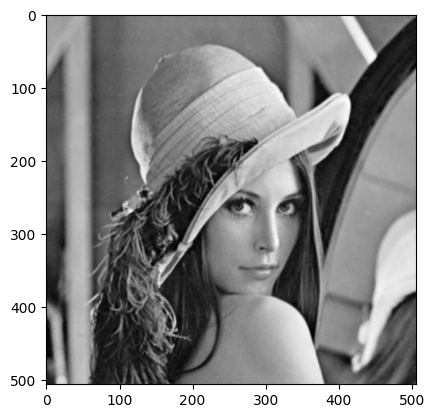

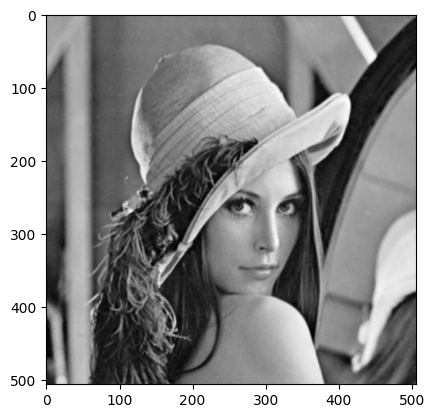

In [45]:
filtre_binomial_3x3 = np.array([[1, 2, 1],
                                [2, 4, 2],
                                [1, 2, 1]]) / 16
image_cov_binomial3x3 = convolution(img, filtre_binomial_3x3)

# Afficher l'image en niveaux de gris
plt.imshow(image_cov_binomial3x3, cmap='gray')
plt.show()

# Appliquer la convolution avec scipy.signal.convolve2d
resultat_convolution_scipy = convolve2d(img, filtre_binomial_3x3, mode='valid')
plt.imshow(resultat_convolution_scipy, cmap='gray')
plt.show()

* Vérifiez que votre fonction fonctionne également avec le filtre passe-bas binomial 5x5.

**Note** : comparez vos résultats avec ceux obtenus avec la fonction scipy.signal.convolve2d.

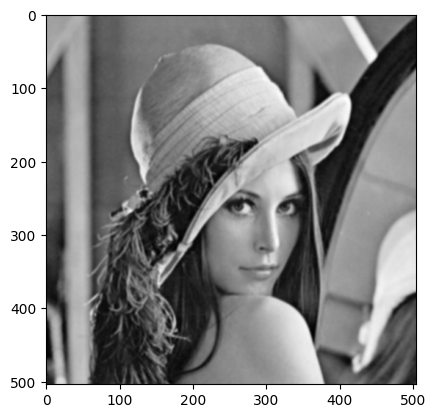

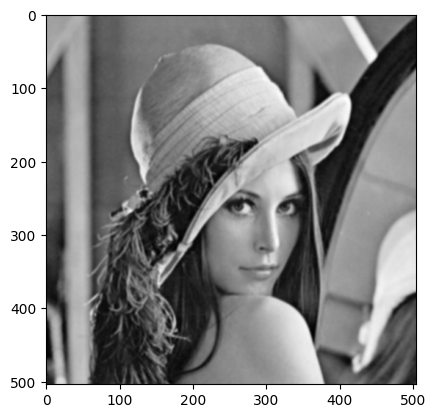

In [47]:
filtre_binomial_5x5 = np.array([[1,  4,  6,  4, 1],
                                [4,  8, 14,  8, 4],
                                [6, 14, 28, 14, 6],
                                [4,  8, 14,  8, 4],
                                [1,  4,  6,  4, 1]]) / 176
image_cov_binomial5x5 = convolution(img, filtre_binomial_5x5)

# Afficher l'image en niveaux de gris
plt.imshow(image_cov_binomial5x5, cmap='gray')
plt.show()

# Appliquer la convolution avec scipy.signal.convolve2d
resultat_convolution_scipy2 = convolve2d(img, filtre_binomial_5x5, mode='valid')
plt.imshow(resultat_convolution_scipy2, cmap='gray')
plt.show()

# Filtre passe-haut et convolution

* Effectuer le même traitement avec les 2 filtres passe-haut.

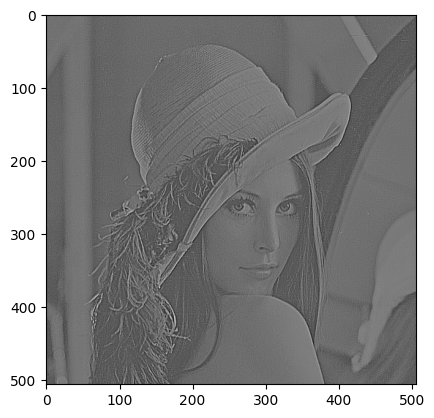

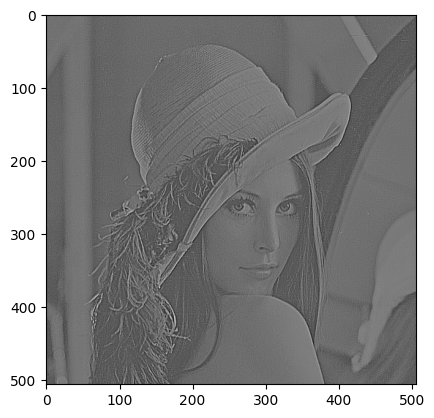

In [46]:
filtre_passe_haut_3x3 = np.array([[-1, -1, -1],
                                  [-1,  9, -1],
                                  [-1, -1, -1]])
image_cov_ph3x3 = convolution(img, filtre_passe_haut_3x3)

# Afficher l'image en niveaux de gris
plt.imshow(image_cov_ph3x3, cmap='gray')
plt.show()

# Appliquer la convolution avec scipy.signal.convolve2d
resultat_convolution_scipy2 = convolve2d(img, filtre_passe_haut_3x3, mode='valid')
plt.imshow(resultat_convolution_scipy2, cmap='gray')
plt.show()

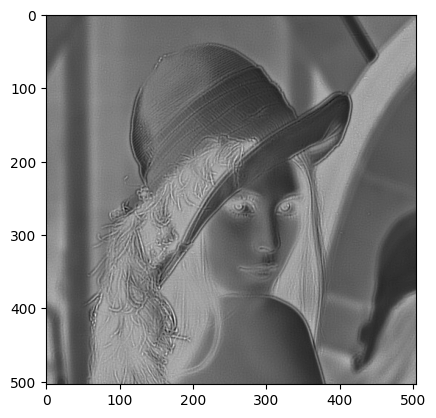

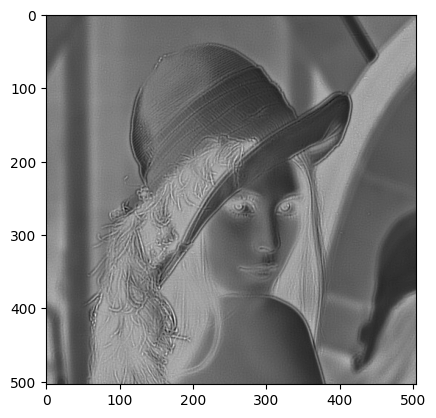

In [48]:
filtre_passe_haut_5x5 = np.array([[-1, -1, -1, -1, -1],
                                  [-1,  0,  0,  0, -1],
                                  [-1,  0,  9,  0, -1],
                                  [-1,  0,  0,  0, -1],
                                  [-1, -1, -1, -1, -1]]) / 16
image_cov_ph5x5 = convolution(img, filtre_passe_haut_5x5)

# Afficher l'image en niveaux de gris
plt.imshow(image_cov_ph5x5, cmap='gray')
plt.show()

# Appliquer la convolution avec scipy.signal.convolve2d
resultat_convolution_scipy2 = convolve2d(img, filtre_passe_haut_5x5, mode='valid')
plt.imshow(resultat_convolution_scipy2, cmap='gray')
plt.show()

* Commentez les résultats, en comparant le filtrage passe-haut et le filtrage passe-bas.



Filtrage passe-haut (détection de contours) :

* Ce type de filtrage accentue les variations brusques d'intensité dans une image, mettant en évidence les contours et les détails fins.

* Les régions homogènes sont supprimées, tandis que les bords et les contours sont renforcés.

* Le résultat peut sembler plus bruité car il met en évidence les détails de l'image.


Filtrage passe-bas (filtre binomial) :

* Le filtrage passe-bas vise à lisser une image, en réduisant les variations d'intensité entre les pixels voisins.

* Il est souvent utilisé pour réduire le bruit dans l'image et atténuer les détails fins.
Les contours et les détails sont floutés ou atténués, ce qui peut donner une apparence plus douce à l'image.
Le résultat peut sembler plus lisse et moins bruité, mais il peut aussi perdre certains détails fins.


En général, le filtrage passe-haut est utilisé pour la détection de contours et l'accentuation des détails, tandis que le filtrage passe-bas est utilisé pour le lissage et la réduction du bruit.

# Représentation en fréquence

* Calculer et afficher la représentation fréquentielle de l'image de départ (voir TP2).


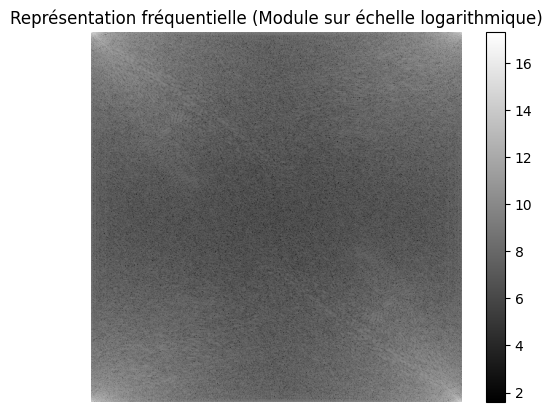

In [56]:
fft_img = np.fft.fft2(img)

# Calculer le module
magnitude_spectrum = np.abs(fft_img)

# Afficher sur une échelle d'intensité logarithmique
magnitude_spectrum_log = np.log(1 + magnitude_spectrum)

plt.imshow(magnitude_spectrum_log, cmap='gray')
plt.axis('off')  # Pour ne pas afficher les axes
plt.colorbar()
plt.title('Représentation fréquentielle (Module sur échelle logarithmique)')
plt.show()

* Calculer et afficher la représentation fréquentielle de la même image après convolution avec un filtre passe-bas 5x5.

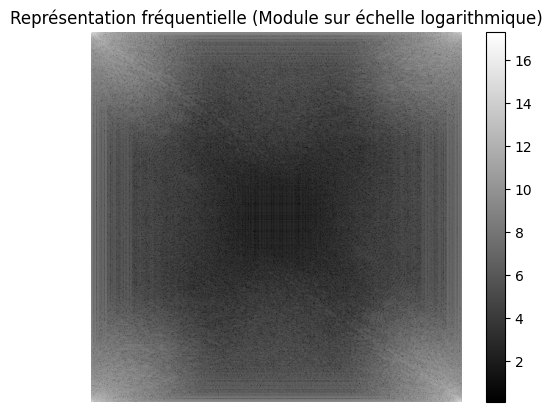

In [57]:
# image après convolution avec un filtre passe-bas 5x5
fft_img2 = np.fft.fft2(image_cov_binomial5x5)

# Calculer le module
magnitude_spectrum = np.abs(fft_img2)

# Afficher sur une échelle d'intensité logarithmique
magnitude_spectrum_log = np.log(1 + magnitude_spectrum)

plt.imshow(magnitude_spectrum_log, cmap='gray')
plt.axis('off')  # Pour ne pas afficher les axes
plt.colorbar()
plt.title('Représentation fréquentielle (Module sur échelle logarithmique)')
plt.show()


* Vérifier la position des basses fréquences et des hautes fréquences sur la représentation des fréquences.

In [64]:
# Basses frequences

# Retrait de coefficients dans une zone rectangulaire :
def filtre_rect(fft_img, coef) :
  # Taille de l'image
  rows, cols = fft_img.shape

  # Déterminer les limites du rectangle (0.25 pour 25%)
  margin_rows = int(rows * np.sqrt(coef))
  margin_cols = int(cols * np.sqrt(coef))

  left = cols // 2 - margin_cols // 2
  right = cols // 2 + margin_cols // 2
  top = rows // 2 - margin_rows // 2
  bottom = rows // 2 + margin_rows // 2

  # Créer un masque rectangulaire de la même taille que l'image fréquentielle
  mask_rect = np.ones_like(fft_img)

  # Remplacer les coefficients dans le rectangle par des zéros
  for ligne in range(top, bottom) :
    for col in range(left, right) :
      mask_rect[ligne, col] = 0

  # Appliquer le masque à l'image fréquentielle
  masked_fft_img = fft_img * mask_rect

  return masked_fft_img


# Hautes frequences

def filtre_bordure(fft_img, coef) :
  # Taille de l'image
  rows, cols = fft_img.shape

  # Déterminer les limites du rectangle (dans ce cas on enleve 25% des coefficients)
  margin_rows = int(rows * np.sqrt(1 - coef))
  margin_cols = int(cols * np.sqrt(1 - coef))

  left = cols // 2 - margin_cols // 2
  right = cols // 2 + margin_cols // 2
  top = rows // 2 - margin_rows // 2
  bottom = rows // 2 + margin_rows // 2

  # Créer un masque rectangulaire de la même taille que l'image fréquentielle (initialiser a 0)
  masque_bordure = np.zeros(np.shape(fft_img), dtype=complex)

  # Remplacer les coefficients dans le rectangle par les valeurs de fft_img
  for ligne in range(top, bottom) :
    for col in range(left, right) :
      masque_bordure[ligne, col] = fft_img[ligne, col]

  return masque_bordure

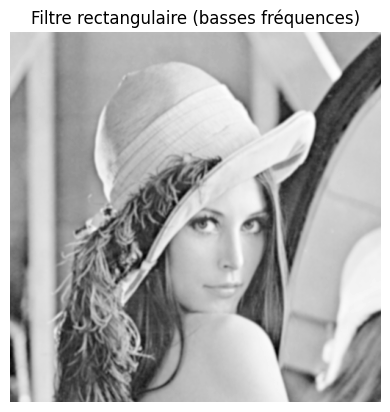

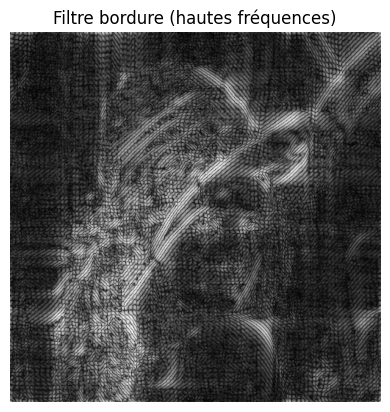

In [76]:
# Vérification basses fréquences
img_rect = np.fft.ifft2(filtre_rect(fft_img2, 0.25))

# Calculer le module
magnitude_spectrum = np.abs(img_rect)

# Afficher sur une échelle d'intensité logarithmique
magnitude_spectrum_log1 = np.log(1 + magnitude_spectrum)

plt.imshow(magnitude_spectrum_log1, cmap='gray')
plt.axis('off')  # Pour ne pas afficher les axes
plt.title('Filtre rectangulaire (basses fréquences)')
plt.show()


# Vérification hautes fréquences
img_bordure = np.fft.ifft2(filtre_bordure(fft_img2, 0.25))

# Calculer le module
magnitude_spectrum = np.abs(img_bordure)

# Afficher sur une échelle d'intensité logarithmique
magnitude_spectrum_log2 = np.log(1 + magnitude_spectrum)

plt.imshow(magnitude_spectrum_log2, cmap='gray')
plt.axis('off')  # Pour ne pas afficher les axes
plt.title('Filtre bordure (hautes fréquences)')
plt.show()

* Écrire une fonction EQM qui calcule l'erreur quadratique moyenne entre 2 images.

In [77]:
def eqm(image1, image2):
    # S'assurer que les deux images ont la même taille
    if image1.shape != image2.shape:
        raise ValueError("Les deux images doivent avoir la même taille")

    # Calculer l'erreur quadratique moyenne
    mse = np.mean((image1 - image2)**2)
    return mse

* Déduire quelles sont les fréquences hautes et basses qui ont le plus d'influence sur l'erreur quadratique moyenne (et donc sur le contenu de l'image).

In [80]:
#score_basse_freq = eqm()
#score_haute_freq = eqm()
#print("Score erreur(EQM) pour les basses frequences : ", score_basse_freq)
#print("Score erreur(EQM) pour les hautes frequences : ", score_haute_freq)